<a href="https://colab.research.google.com/github/anhhaibkhn/ocr-opencv-python-tutorials/blob/main/opencv_review/opencv_review2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""" a list of preprocessing funcs for tessaract """
import cv2
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

txt_block_img shape: (129, 564, 3), dtype: uint8


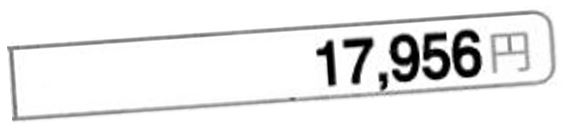

txt_block_img shape: (129, 564, 3), dtype: uint8
gray shape: (129, 564), dtype: uint8


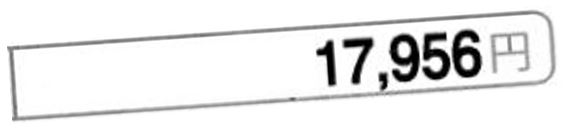

txt_block_img shape: (129, 564, 3), dtype: uint8
gray shape: (129, 564), dtype: uint8
thresh shape: (129, 564), dtype: uint8


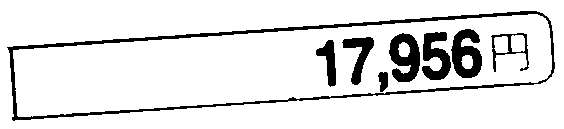

txt_block_img shape: (129, 564, 3), dtype: uint8
gray shape: (129, 564), dtype: uint8
thresh shape: (129, 564), dtype: uint8
open shape: (129, 564), dtype: uint8


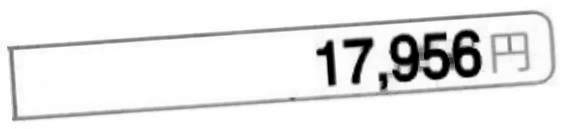

txt_block_img shape: (129, 564, 3), dtype: uint8
gray shape: (129, 564), dtype: uint8
thresh shape: (129, 564), dtype: uint8
open shape: (129, 564), dtype: uint8
canny_gr shape: (129, 564), dtype: uint8


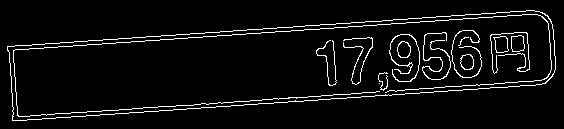

In [44]:
from google.colab.patches import cv2_imshow
# bin_img = cv2.imread("/content/69_table02.tif")
# cv2_imshow(bin_img)

# txt_block_img = cv2.imread('/content/text_block_color.JPG')
# txt_block_img = cv2.imread('/content/money_cell_2.JPG')
txt_block_img = cv2.imread('/content/money_cell_2_rotated.JPG')
print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
cv2_imshow(txt_block_img)

gray = get_grayscale(txt_block_img)
print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
cv2_imshow(gray)

thresh = thresholding(gray)
print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
print("thresh shape: {}, dtype: {}".format(thresh.shape, thresh.dtype))
cv2_imshow(thresh)

open = opening(gray)
print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
print("thresh shape: {}, dtype: {}".format(thresh.shape, thresh.dtype))
print("open shape: {}, dtype: {}".format(open.shape, open.dtype))
cv2_imshow(open)

canny_gr = canny(gray)
print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
print("thresh shape: {}, dtype: {}".format(thresh.shape, thresh.dtype))
print("open shape: {}, dtype: {}".format(open.shape, open.dtype))
print("canny_gr shape: {}, dtype: {}".format(canny_gr.shape, canny_gr.dtype))
cv2_imshow(canny_gr)

In [ ]:
!sudo apt -y update
!sudo apt -y install tesseract-ocr tesseract-ocr-jpn libtesseract-dev libleptonica-dev tesseract-ocr-script-jpan tesseract-ocr-script-jpan-vert 
!pip install tesserocr

In [53]:
from tesserocr import PyTessBaseAPI, PSM
from PIL import ImageOps, Image
from google.colab.patches import cv2_imshow

##### TESTING WHICH PREPROCESSED PIC IS THE BEST FOR EXTRACTING TXT 

def get_text( nd_array):
    cropped_pil_im = Image.fromarray(nd_array)

    # # 文字ギリギリなので、まわりを広げる
    im = ImageOps.expand(cropped_pil_im, border=10, fill='white')

    # # NOTE: SetImage が内部で jpeg で Image.save しようとするが
    # # alpha channel が含まれているとエラーになる
    # # RGB に変換してから SetImage する
    rgb_im = im.convert('RGB')

    with PyTessBaseAPI(lang="jpn", psm=PSM.SINGLE_BLOCK) as api:
        api.SetImage(rgb_im)
        txt = api.GetUTF8Text()

    if txt == '':
        with PyTessBaseAPI(lang="jpn", psm=PSM.SINGLE_LINE) as api:
            api.SetImage(rgb_im)
            txt = api.GetUTF8Text()

    if txt == '':
        with PyTessBaseAPI(lang="jpn", psm=PSM.SINGLE_WORD) as api:
            api.SetImage(rgb_im)
            txt = api.GetUTF8Text()

    return txt


def get_all_preprocess_imgs(org_img_path, debug = False):
    txt_block_img = cv2.imread(org_img_path)
    print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
    if debug: cv2_imshow(txt_block_img)

    gray = get_grayscale(txt_block_img)
    # print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
    print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
    if debug: cv2_imshow(gray)

    thresh = thresholding(gray)
    # print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
    # print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
    print("thresh shape: {}, dtype: {}".format(thresh.shape, thresh.dtype))
    if debug: cv2_imshow(thresh)

    open = opening(gray)
    # print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
    # print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
    # print("thresh shape: {}, dtype: {}".format(thresh.shape, thresh.dtype))
    print("open shape: {}, dtype: {}".format(open.shape, open.dtype))
    if debug: cv2_imshow(thresh)

    canny_gr = canny(gray)
    # print("txt_block_img shape: {}, dtype: {}".format(txt_block_img.shape, txt_block_img.dtype))
    # print("gray shape: {}, dtype: {}".format(gray.shape, gray.dtype))
    # print("thresh shape: {}, dtype: {}".format(thresh.shape, thresh.dtype))
    # print("open shape: {}, dtype: {}".format(open.shape, open.dtype))
    print("canny_gr shape: {}, dtype: {}".format(canny_gr.shape, canny_gr.dtype))
    if debug: cv2_imshow(canny_gr)

    return txt_block_img, gray, thresh, open, canny_gr


def compare_text(preprocess_imgs):
    print("---------------------\ntxt_block_img text: \n{}".format(get_text(preprocess_imgs[0])))
    print("---------------------\ngray text: \n{}".format(get_text(preprocess_imgs[1])))
    print("---------------------\nthresh text: \n{}".format(get_text(preprocess_imgs[2])))
    print("---------------------\nopen text: \n{}".format(get_text(preprocess_imgs[3])))
    print("---------------------\ncanny_gr text: \n{}".format(get_text(preprocess_imgs[4])))


In [11]:
import imutils
from imutils.perspective import four_point_transform
from skimage.segmentation import clear_border

def find_four_point_and_deskew_puzzle_rect(image, debug = False): 
    # convert the image to grayscale and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 3 )
    # apply adaptive thresholding and then invert the threshold map
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    thresh = cv2.bitwise_not(thresh)
    # check to see if we are visualizing each step of the image
    # processing pipeline (in this case, thresholding)
    if debug:
        print("Puzzle Thresh")
        cv2_imshow(thresh)


    # find contours in the thresholded image and sort them by size in descending order
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # initialize a contour that corresponds to the puzzle outline
    puzzleCnt = None    
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points, then we can
        # assume we have found the outline of the puzzle
        if len(approx) == 4:
            puzzleCnt = approx
            break

    # if the puzzle contour is empty then our script could not find
    # the outline of the sudoku puzzle so raise an error
    if puzzleCnt is None:
        raise Exception(("Could not find sudoku puzzle outline. "
                        "Try debugging your thresholding and contour steps."))

    # check to see if we are visualizing the outline of the detected sudoku puzzle
    if debug:
        # draw the contour of the puzzle on the image and then display
        # it to our screen for visualization/debugging purposes
        output = image.copy()
        cv2.drawContours(output, [puzzleCnt], -1, (0, 255, 0), 2)
        print("Puzzle Outline")
        cv2_imshow(output) 

    # apply a four-point perspective transform to both the original
    # image and grayscale image to obtain a top-down bird's-eye view of the puzzle
    puzzle = four_point_transform(image, puzzleCnt.reshape(4, 2))
    warped = four_point_transform(gray, puzzleCnt.reshape(4, 2))    
    # check to see if we are visualizing the perspective transform
    if debug:
        # show the output warped image (again, for debugging purposes)
        print("Puzzle Transform")
        cv2_imshow(puzzle) 

        # return a 2-tuple of puzzle in both RGB and grayscale
        return (puzzle, warped)



Puzzle Thresh


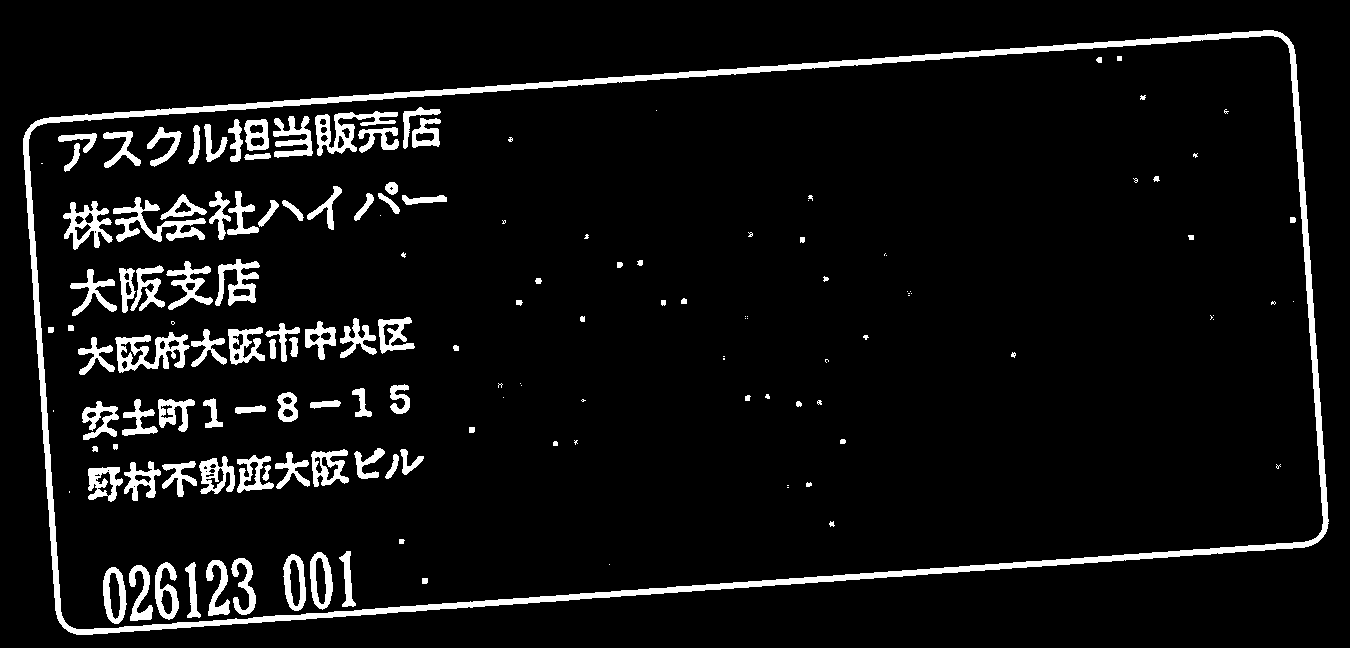

Puzzle Outline


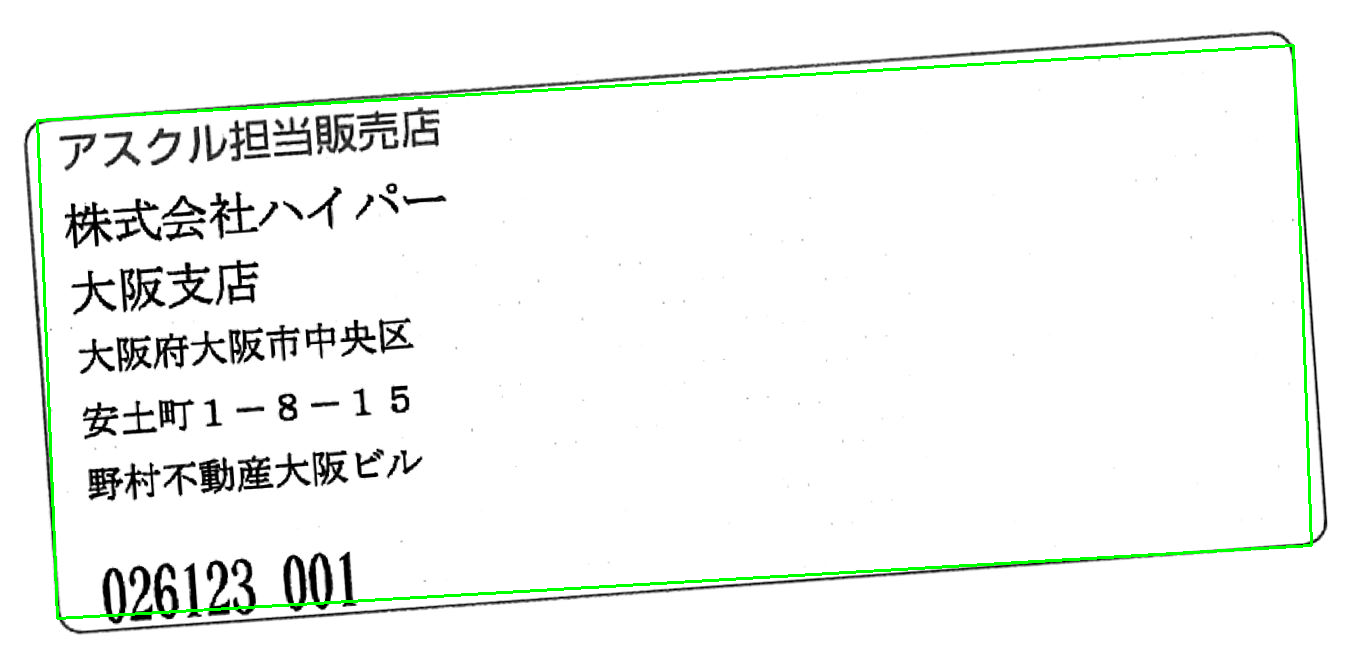

Puzzle Transform


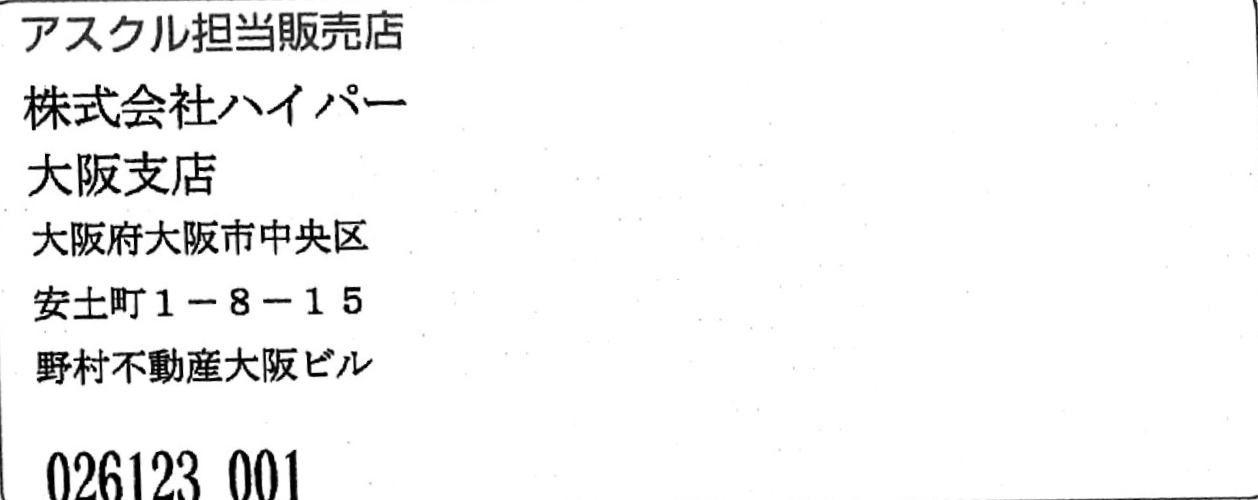

In [16]:
test_img_path = '/content/text_block_rotated.JPG'

pre_imgs = get_all_preprocess_imgs(test_img_path)
# compare_text(pre_imgs)

deskew_img, _ = find_four_point_and_deskew_puzzle_rect(pre_imgs[0], True)
# compare_text(deskew_img)

In [35]:

def deskewing_text(image_path):
    image = cv2.imread(image_path)
    # convert the image to grayscale and flip the foreground
    # and background to ensure foreground is now "white" and the background is "black"
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    # threshold the image, setting all foreground pixels to 255 and all background pixels to 0
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    # the `cv2.minAreaRect` function returns values in the range [-90, 0); 
    # as the rectangle rotates clockwise the returned angle trends to 0 
    # --  in this special case we need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)
    # otherwise, just take the inverse of the angle to make it positive
    else:
        angle = -angle

    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    # draw the correction angle on the image so we can validate it
    # cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
    #     (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    # show the output image
    print("[INFO] angle: {:.3f}".format(angle))

    print("Input image")
    cv2_imshow(image)

    print("Rotated image")
    cv2_imshow(rotated)

    return rotated


[INFO] angle: -3.966
Input image


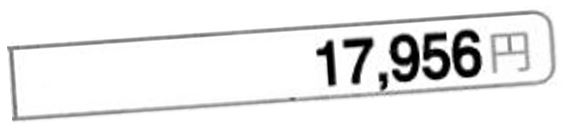

Rotated image


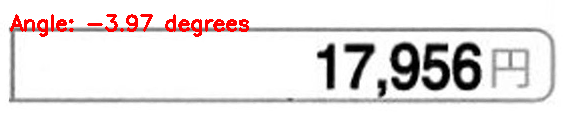

True

In [31]:
import os
# test_img_path = '/content/text_block_rotated.JPG'
test_img_path = '/content/money_cell_2_rotated.JPG'

deskew_img_path = os.path.splitext(test_img_path)[0] +'_deskew.jpg'

deskew_img = deskewing_text(test_img_path)
cv2.imwrite(deskew_img_path, deskew_img)

In [32]:
pre_images = get_all_preprocess_imgs(deskew_img_path)
compare_text(pre_images)

---------------------
txt_block_img text: 
ド - *      17.956=

---------------------
gray text: 
| 17956ロ

---------------------
thresh text: 
| 17956ロ)

---------------------
open text: 
「- 17856)

---------------------
canny_gr text: 
IA958選



[INFO] angle: 3.171
Input image


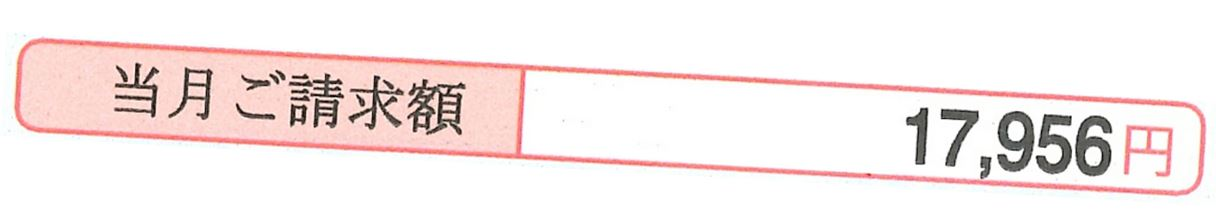

Rotated image


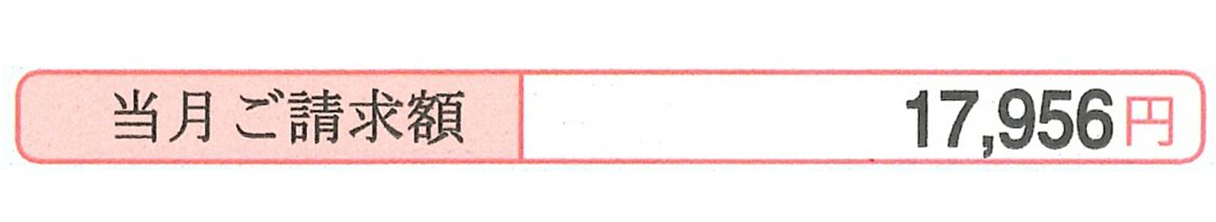

txt_block_img shape: (222, 1216, 3), dtype: uint8


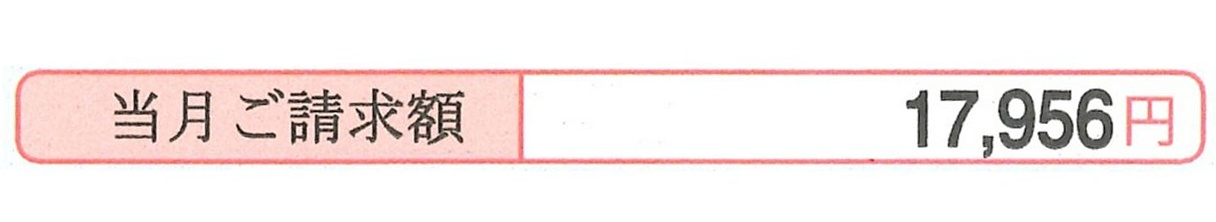

gray shape: (222, 1216), dtype: uint8


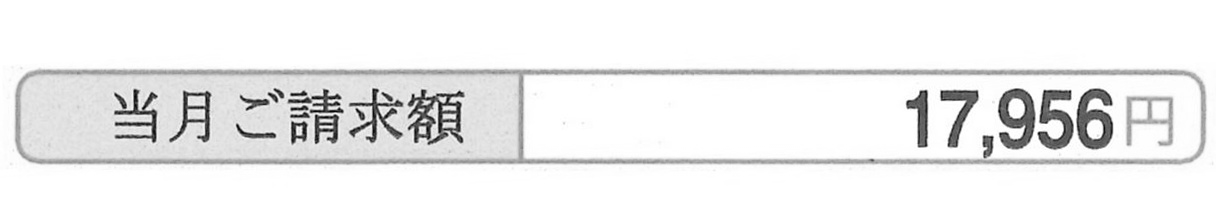

thresh shape: (222, 1216), dtype: uint8


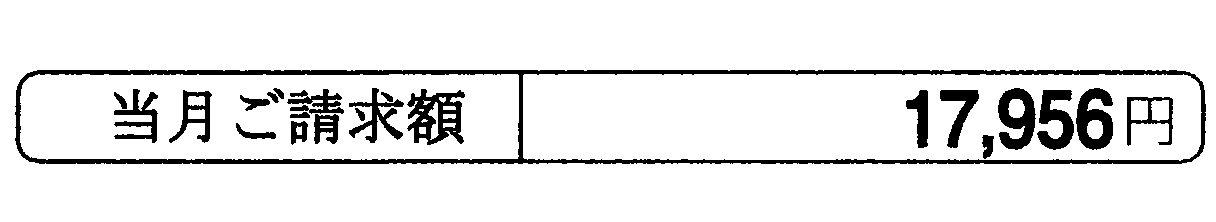

open shape: (222, 1216), dtype: uint8


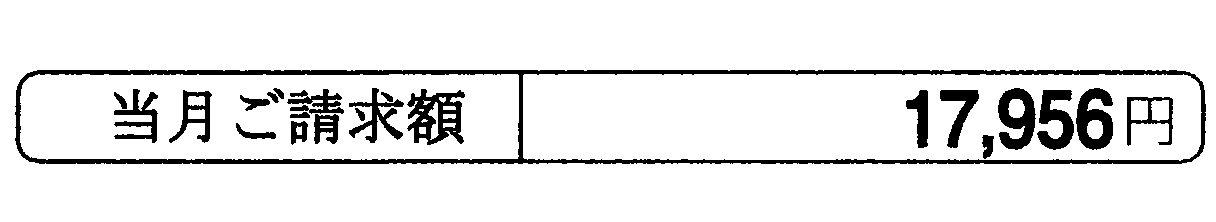

canny_gr shape: (222, 1216), dtype: uint8


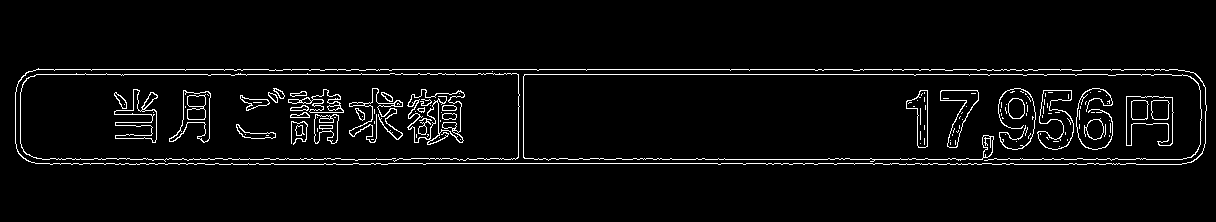

---------------------
txt_block_img text: 
              17.956昌

---------------------
gray text: 
              17.956品

---------------------
thresh text: 
当月ご請求額                             17,956貴

---------------------
open text: 
75

---------------------
canny_gr text: 
世攻馬 昌還



In [74]:
########### Above I tested with all pics having border, what about without borders ###########
import os
# noborder_rotated_img_path = '/content/text_block_noborder_rotated_2.JPG'
# noborder_rotated_img_path = '/content/money_cell_2_noborder_rotated.JPG'
noborder_rotated_img_path = '/content/money_cells_color_rotated.JPG'

noborder_deskew_img_path = os.path.splitext(noborder_rotated_img_path)[0] +'_deskew.jpg'

noborder_deskew_img = deskewing_text(noborder_rotated_img_path)
cv2.imwrite(noborder_deskew_img_path, noborder_deskew_img)

pre_images = get_all_preprocess_imgs(noborder_deskew_img_path, 1)
compare_text(pre_images)

[INFO] angle: 3.145
Input image


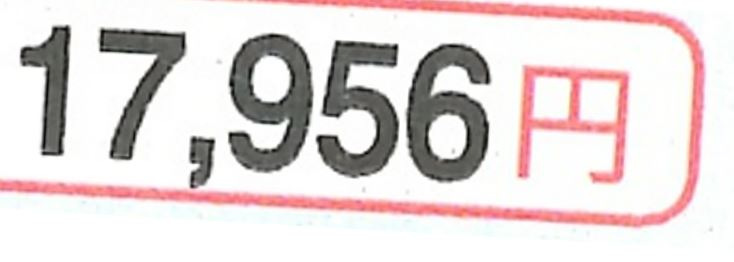

Rotated image


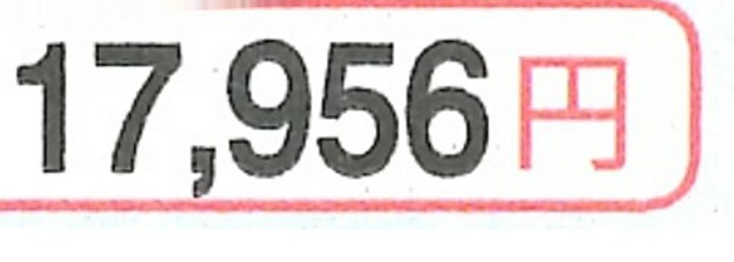

txt_block_img shape: (262, 734, 3), dtype: uint8


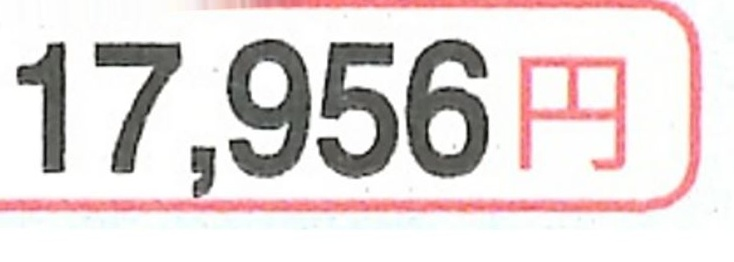

gray shape: (262, 734), dtype: uint8


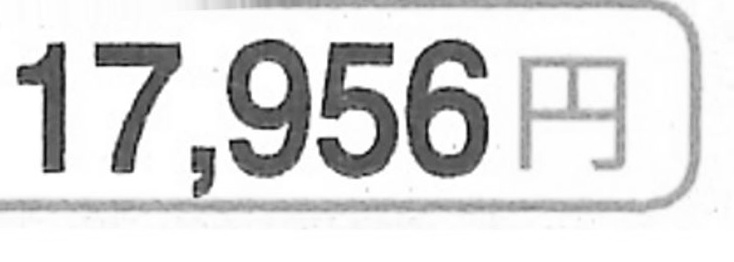

thresh shape: (262, 734), dtype: uint8


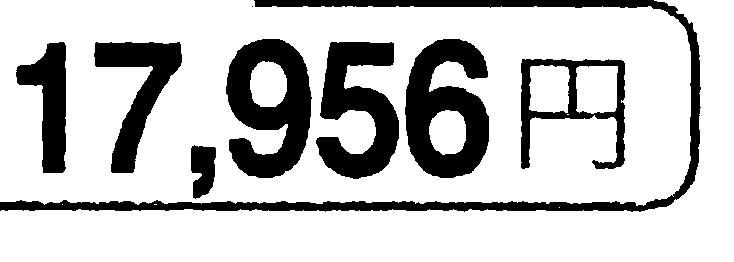

open shape: (262, 734), dtype: uint8


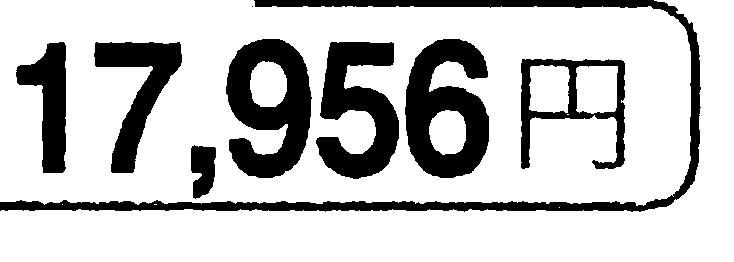

canny_gr shape: (262, 734), dtype: uint8


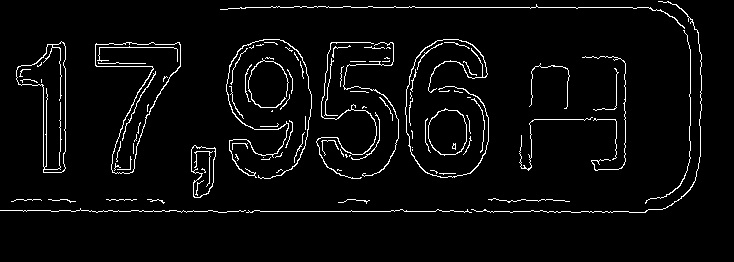

---------------------
txt_block_img text: 
17.956貴|

---------------------
gray text: 
17.956口 」

---------------------
thresh text: 
17.956円 |

---------------------
open text: 
17,956申 」

---------------------
canny_gr text: 
(Se提



In [56]:
# noborder_rotated_img_path = '/content/text_block_noborder_rotated_2.JPG'
# noborder_rotated_img_path = '/content/money_cell_2_noborder_rotated.JPG'
noborder_rotated_img_path = '/content/bordered_unclear.JPG'

noborder_deskew_img_path = os.path.splitext(noborder_rotated_img_path)[0] +'_deskew.jpg'

noborder_deskew_img = deskewing_text(noborder_rotated_img_path)
cv2.imwrite(noborder_deskew_img_path, noborder_deskew_img)

pre_images = get_all_preprocess_imgs(noborder_deskew_img_path,1)
compare_text(pre_images)

##### That is the end of the tests for the current extract function, lets try with pytessract nanotech function 


In [60]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=aba468e04140b5dded928b76b354c7032e3bf29084e3e3624ea15deb3dbede13
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [70]:
import cv2 
import pytesseract
from PIL import ImageOps, Image

# img = cv2.imread('image.jpg')
# rgb_im = Image.fromarray(nd_array)

def get_text_pytesseract(nd_array):

    cropped_pil_im = Image.fromarray(nd_array)
    # # 文字ギリギリなので、まわりを広げる
    im = ImageOps.expand(cropped_pil_im, border=10, fill='white')

    # # NOTE: SetImage が内部で jpeg で Image.save しようとするが
    # # alpha channel が含まれているとエラーになる
    # # RGB に変換してから SetImage する
    rgb_im = im.convert('RGB')

    # Adding custom options
    custom_config = r'--oem 3 --psm 6'
    txt = pytesseract.image_to_string(rgb_im,lang='jpn', config=custom_config)

    if txt == '':
        custom_config = r'--oem 3 --psm 7'
        txt = pytesseract.image_to_string(rgb_im,lang='jpn', config=custom_config)

    if txt == '':
        custom_config = r'--oem 3 --psm 8'
        txt = pytesseract.image_to_string(rgb_im,lang='jpn', config=custom_config)


    return txt


def compare_text_pytesseract(preprocess_imgs):
    print("---------------------\ntxt_block_img text: \n{}".format(get_text_pytesseract(preprocess_imgs[0])))
    print("---------------------\ngray text: \n{}".format(get_text_pytesseract(preprocess_imgs[1])))
    print("---------------------\nthresh text: \n{}".format(get_text_pytesseract(preprocess_imgs[2])))
    print("---------------------\nopen text: \n{}".format(get_text_pytesseract(preprocess_imgs[3])))
    print("---------------------\ncanny_gr text: \n{}".format(get_text_pytesseract(preprocess_imgs[4])))


txt_block_img shape: (222, 1216, 3), dtype: uint8


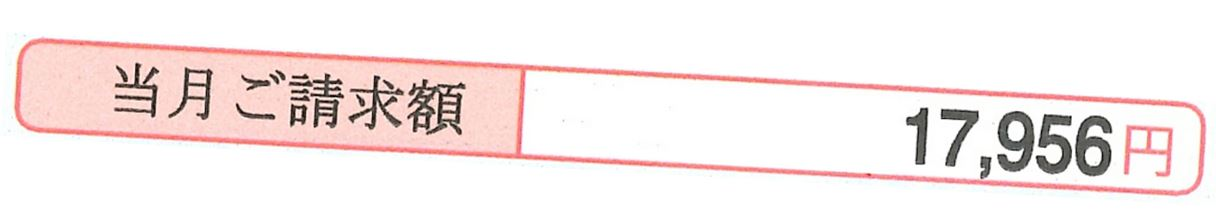

gray shape: (222, 1216), dtype: uint8


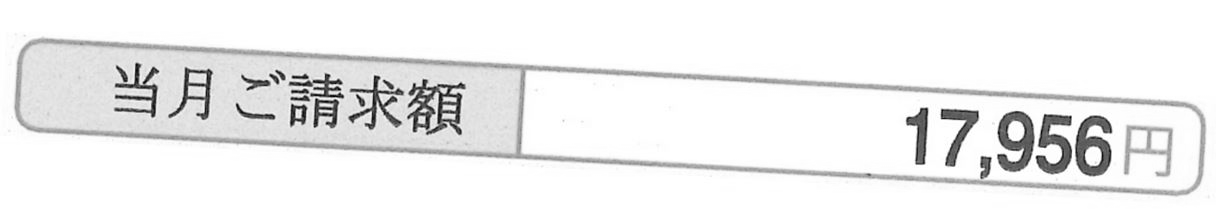

thresh shape: (222, 1216), dtype: uint8


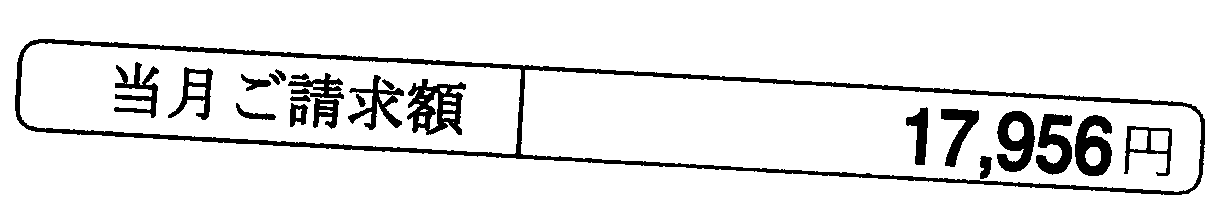

open shape: (222, 1216), dtype: uint8


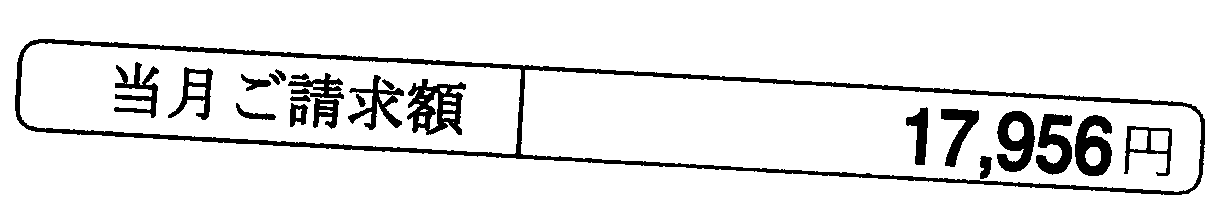

canny_gr shape: (222, 1216), dtype: uint8


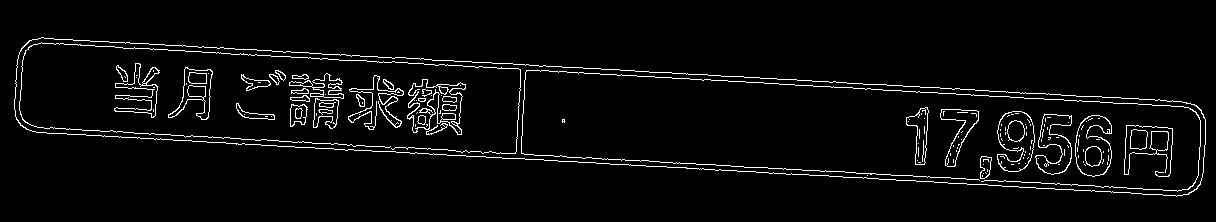

---------------------
txt_block_img text: 
         7856F

---------------------
gray text: 
当月ご請求額                  17,.956貴

---------------------
thresh text: 
当月ご請求額                  17,.956円

---------------------
open text: 

---------------------
canny_gr text: 
人           7.988



In [72]:
test_img_path = '/content/money_cells_color_rotated.JPG'

pre_imgs = get_all_preprocess_imgs(test_img_path,1)
compare_text_pytesseract(pre_imgs)


[INFO] angle: 3.171
Input image


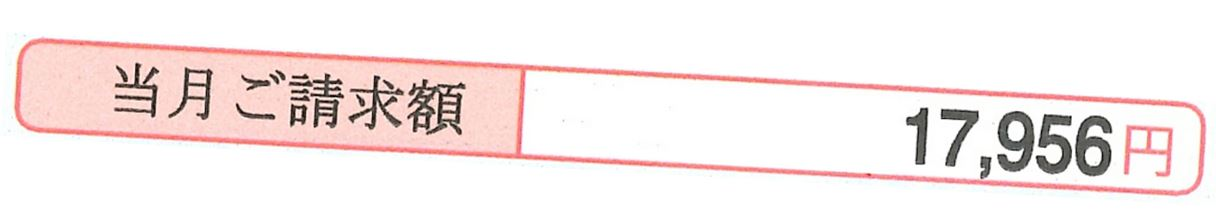

Rotated image


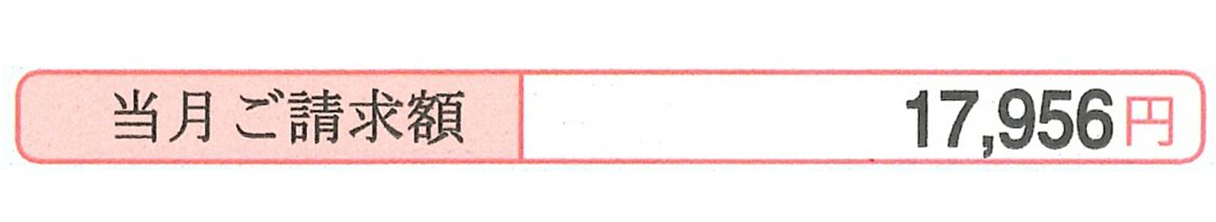

txt_block_img shape: (222, 1216, 3), dtype: uint8


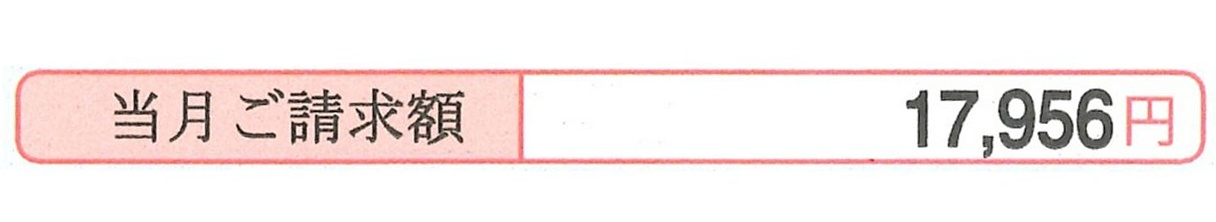

gray shape: (222, 1216), dtype: uint8


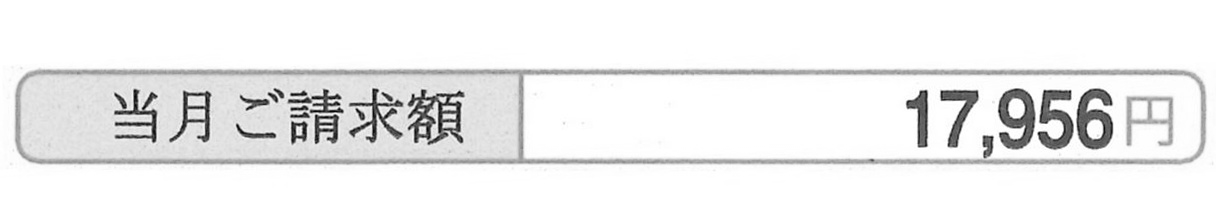

thresh shape: (222, 1216), dtype: uint8


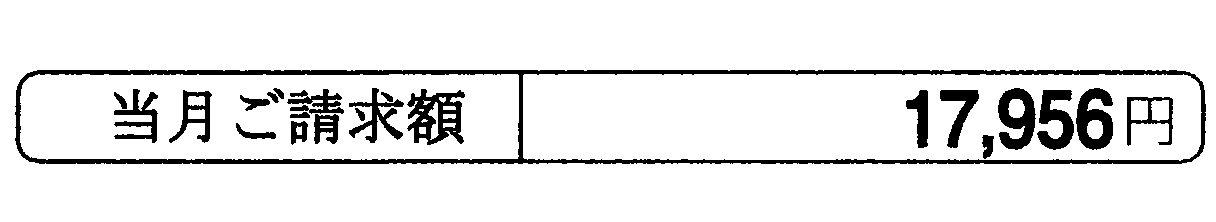

open shape: (222, 1216), dtype: uint8


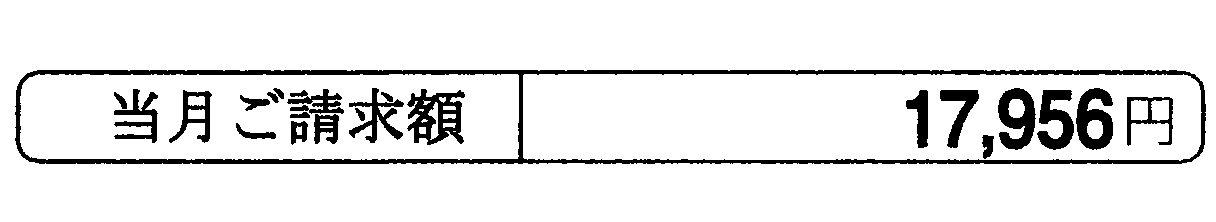

canny_gr shape: (222, 1216), dtype: uint8


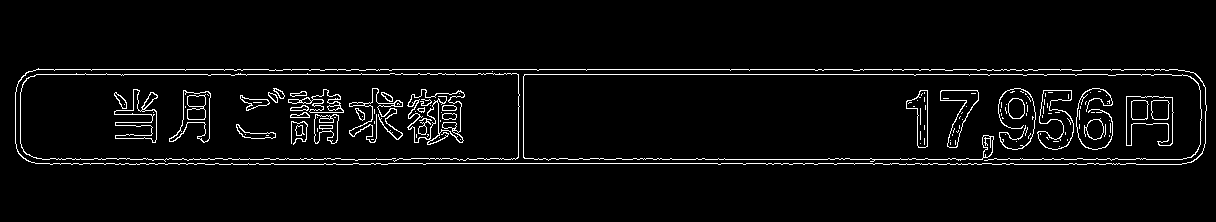

---------------------
txt_block_img text: 
              17.956昌

---------------------
gray text: 
              17.956品

---------------------
thresh text: 
当月ご請求額                             17,956貴

---------------------
open text: 
75

---------------------
canny_gr text: 
世攻馬 昌還



In [73]:
# deskew pic path
noborder_deskew_img_path = os.path.splitext(test_img_path)[0] +'_deskew.jpg'
# deskew the pic
noborder_deskew_img = deskewing_text(test_img_path)
# save the deskew pic to its path
cv2.imwrite(noborder_deskew_img_path, noborder_deskew_img)

pre_images = get_all_preprocess_imgs(noborder_deskew_img_path, 1)
compare_text(pre_images)

[INFO] angle: 3.145
Input image


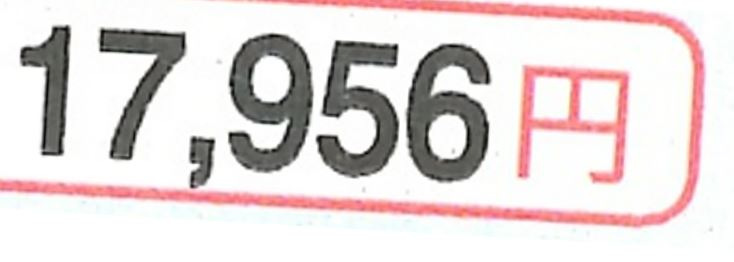

Rotated image


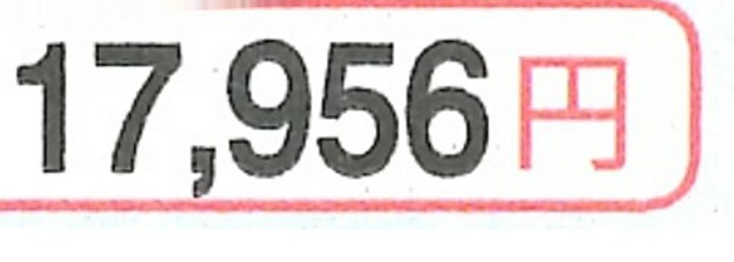

txt_block_img shape: (262, 734, 3), dtype: uint8


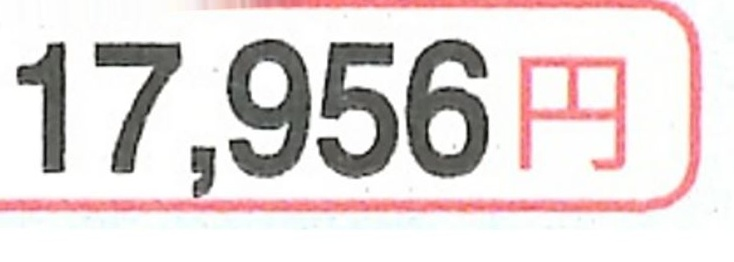

gray shape: (262, 734), dtype: uint8


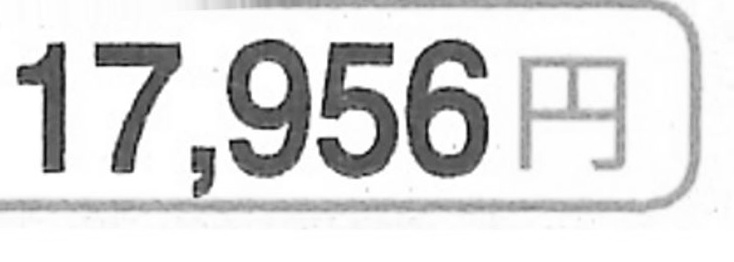

thresh shape: (262, 734), dtype: uint8


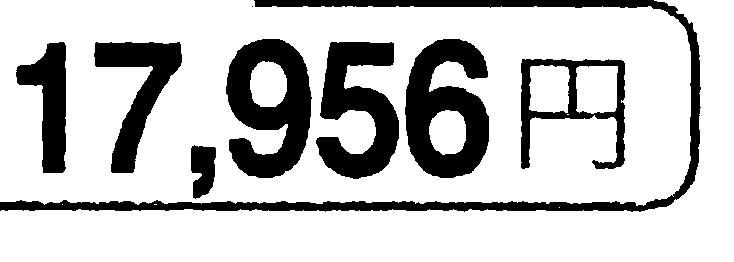

open shape: (262, 734), dtype: uint8


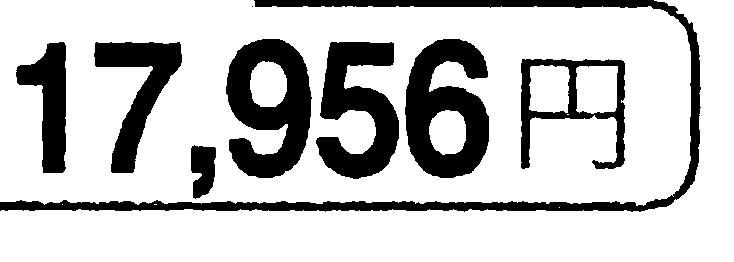

canny_gr shape: (262, 734), dtype: uint8


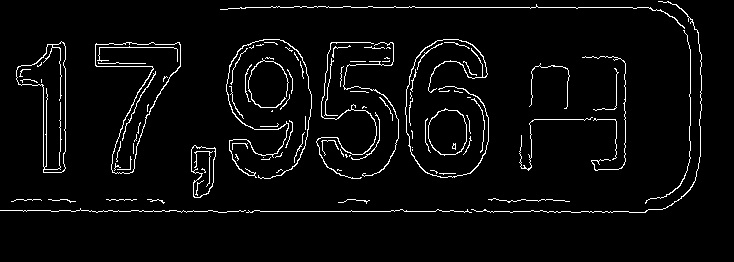

---------------------
txt_block_img text: 
17.956貴|

---------------------
gray text: 
17.956口 」

---------------------
thresh text: 
17.956円 |

---------------------
open text: 
17,956申 」

---------------------
canny_gr text: 



In [84]:
noborder_rotated_img_path = '/content/bordered_unclear.JPG'

noborder_deskew_img_path = os.path.splitext(noborder_rotated_img_path)[0] +'_deskew.jpg'

noborder_deskew_img = deskewing_text(noborder_rotated_img_path)
cv2.imwrite(noborder_deskew_img_path, noborder_deskew_img)

pre_images = get_all_preprocess_imgs(noborder_deskew_img_path,1)
compare_text_pytesseract(pre_images)

##### The current text extraction algorithm is working pretty well. So no need to modify futher. 

##### we may net to clean the text before adding it to frame, as follows:

In [83]:
import re
a_string = '17.,/976'
numeric_string  = re.sub("[^0-9]", "", a_string)
print(int(numeric_string))

17976
